In [27]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
import math 
import matplotlib.pyplot as plt
import sklearn
import random
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

df = pd.read_csv(
    'C:/Users/crump/Documents/University/755 Data Analytics/jpx_tokyo_se_prediction/train_files/stock_prices.csv',
     usecols=[2,6,11], 
    )


df.head()

,SecuritiesCode,Close,Target
0,1301,2742.0,0.000730
1,1332,571.0,0.012324
2,1333,3210.0,0.006154
3,1376,1550.0,0.011053
4,1377,3330.0,0.003026


In [28]:
 df[['Close', 'Target']] = (df[['Close', 'Target']].dropna())

In [29]:
scaler = MinMaxScaler(feature_range=(-1, 1))
print(scaler.fit(df.Close))



ValueError: Expected 2D array, got 1D array instead:
array=[2742.  571. 3210. ... 1645. 2389.  696.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
def eucledean_distance(x, y):
    d = 0.0
    
    for i in range(len(x)):
        d += (x[i] - y[i])**2
    d = math.sqrt(d)
    
    return d

In [25]:
def kmeans_cluster(rows, distance = eucledean_distance, k = 3, iter = 10):
    
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows])) for i in range(len(rows[0]))]
    print(ranges)
    
    # Create k randomly placed centroids
    #centroids=[[random.random( ) * (ranges[i][1] - ranges[i][0]) + ranges[i][0]  for i in range(len(rows[0]))] for j in range(k)]
    centroids=[[0,0.9],[0.1,0.6],[0, 0.3]]
    print(centroids)
    
    prev_cluster_labels = None
    for t in range(iter):
        #print('Iteration %d' % t)
        cluster_labels = [[] for i in range(k)]
        #print(cluster_labels)
        # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row = rows[j]
            best_match = 0
            for i in range(k):
                d = distance(centroids[i],row)
                if d < distance(centroids[best_match],row): 
                    best_match=i
            cluster_labels[best_match].append(j)
            
        # If the results are the same as last time, this is complete
        if cluster_labels == prev_cluster_labels:
            break
        prev_cluster_labels = cluster_labels
    
        # Move the centroids to the average of their members
        for i in range(k):
            avgs = [0.0] * len(rows[0])
            if len(cluster_labels[i]) > 0:
                for rowid in cluster_labels[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m] += rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j] /= len(cluster_labels[i])
                centroids[i] = avgs
            
    return cluster_labels, centroids

[(14.0, 109550.0), (-0.5785413744740533, 0.6182380216383307)]
[[0, 0.9], [0.1, 0.6], [0, 0.3]]


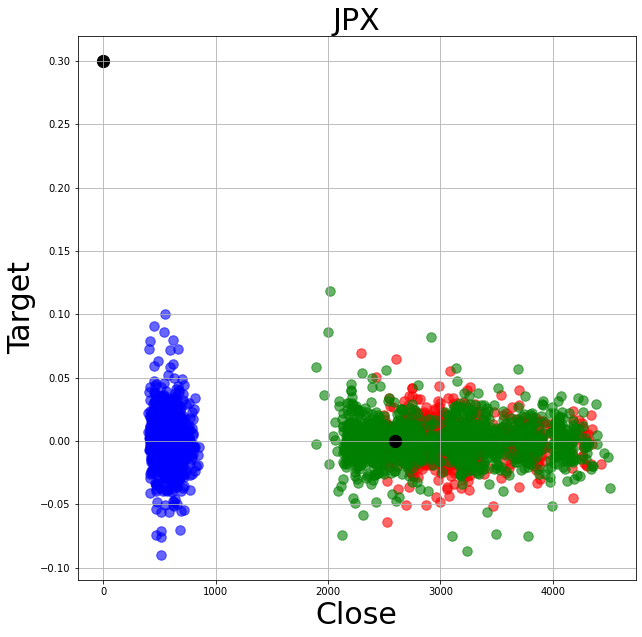

In [26]:
labels, centroids = kmeans_cluster(rows=df[['Close', 'Target']].values,k = 3, iter = 3)
#print labels, centroids
fig, axes = plt.subplots()
fig.set_size_inches(10,10)

axes.set_xlabel('Close',fontsize=30)
axes.set_ylabel('Target',fontsize=30)
plt.title('JPX',fontsize=30)
axes.grid()

axes.scatter(df.Close.where(df.SecuritiesCode == 1301), df.Target.where(df.SecuritiesCode == 1301), s=90, alpha=0.6, c='red')
axes.scatter(df.Close.where(df.SecuritiesCode == 1332), df.Target.where(df.SecuritiesCode == 1332), s=90, alpha=0.6, c='blue')
axes.scatter(df.Close.where(df.SecuritiesCode == 1333), df.Target.where(df.SecuritiesCode == 1333), s=90, alpha=0.6, c='green')


axes.scatter(centroids[0][0],centroids[0][1], s=150, alpha=1, c='black')
axes.scatter(centroids[1][0], centroids[1][1], s=150, alpha=1, c='black')
axes.scatter(centroids[2][0], centroids[2][1], s=150, alpha=1, c='black')

plt.show()